In [2]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bmtk.utils.reports.compartment import CompartmentReport

# Tone-Shock

In [19]:
f = h5py.File('./tone_shock_100p/spikes.h5','r')
g = h5py.File('./tone_shock_50p/spikes.h5','r')
h = h5py.File('./tone_shock_100p/spikes.h5','r')

In [20]:
ts = f['spikes']['BLA']['timestamps'][:]
nids = f['spikes']['BLA']['node_ids'][:]

ts_PNA = ts[(nids>0) & (nids<2846)]
nids_PNA = nids[(nids>0) & (nids<2846)]

ts_PNC = ts[(nids>2846) & (nids<4000)]
nids_PNC = nids[(nids>2846) & (nids<4000)]

ts_PV = ts[(nids>4000) & (nids<4465)]
nids_PV = nids[(nids>4000) & (nids<4465)]

In [21]:
PNA = [0,2844]
PNC = [2845, 3999]
PV = [4000, 4465]
SOM = [4466, 4721]

ts = f['spikes']['BLA']['timestamps'][:]
nids = f['spikes']['BLA']['node_ids'][:]

df_baseline = pd.DataFrame(data=np.concatenate((ts[(ts>3000)].reshape(-1,1), nids[(ts>3000)].reshape(-1,1)),axis=1), 
                           columns=['timestamps','node_ids'])
df_baseline['type'] = 'PNA'
df_baseline.loc[(df_baseline['node_ids']>=PNC[0]) & 
                (df_baseline['node_ids']<=PNC[1]), 'type'] = 'PNC'
df_baseline.loc[(df_baseline['node_ids']>=PV[0]) & 
                (df_baseline['node_ids']<=PV[1]), 'type'] = 'PV'
df_baseline.loc[(df_baseline['node_ids']>=SOM[0]) & 
                (df_baseline['node_ids']<=SOM[1]), 'type'] = 'SOM'

############## 50% block #################
ts = g['spikes']['BLA']['timestamps'][:]
nids = g['spikes']['BLA']['node_ids'][:]

df_50p = pd.DataFrame(data=np.concatenate((ts[(ts>3000)].reshape(-1,1), nids[(ts>3000)].reshape(-1,1)),axis=1), 
                           columns=['timestamps','node_ids'])
df_50p['type'] = 'PNA'
df_50p.loc[(df_50p['node_ids']>=PNC[0]) & 
                (df_50p['node_ids']<=PNC[1]), 'type'] = 'PNC'
df_50p.loc[(df_50p['node_ids']>=PV[0]) & 
                (df_50p['node_ids']<=PV[1]), 'type'] = 'PV'
df_50p.loc[(df_50p['node_ids']>=SOM[0]) & 
                (df_50p['node_ids']<=SOM[1]), 'type'] = 'SOM'

############## 100% block #################
ts = h['spikes']['BLA']['timestamps'][:]
nids = h['spikes']['BLA']['node_ids'][:]

df_100p = pd.DataFrame(data=np.concatenate((ts[(ts>3000)].reshape(-1,1), nids[(ts>3000)].reshape(-1,1)),axis=1), 
                           columns=['timestamps','node_ids'])
df_100p['type'] = 'PNA'
df_100p.loc[(df_100p['node_ids']>=PNC[0]) & 
                (df_100p['node_ids']<=PNC[1]), 'type'] = 'PNC'
df_100p.loc[(df_100p['node_ids']>=PV[0]) & 
                (df_100p['node_ids']<=PV[1]), 'type'] = 'PV'
df_100p.loc[(df_100p['node_ids']>=SOM[0]) & 
                (df_100p['node_ids']<=SOM[1]), 'type'] = 'SOM'

In [22]:
pre_fr_PNA = df_baseline[(df_baseline.timestamps>5500)&
                         (df_baseline.timestamps<6500)&
                         (df_baseline.type=='PNA')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'pre_FR'})
# make sure zero spiking cells get counted #
z_df = pd.DataFrame(data=np.arange(PNA[0],PNA[1]+1).reshape(-1,1),              
                    columns=['node_ids'])
pre_fr_PNA = pre_fr_PNA.set_index('node_ids').join(z_df.set_index('node_ids'),how='outer').reset_index()
pre_fr_PNA.loc[pd.isnull(pre_fr_PNA.pre_FR),'pre_FR'] = 0

post_fr_PNA = df_baseline[(df_baseline.timestamps>29000)&
                          (df_baseline.timestamps<36000)&
                          (df_baseline.type=='PNA')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'post_FR'})
# make sure zero spiking cells get counted #
post_fr_PNA = post_fr_PNA.set_index('node_ids').join(z_df.set_index('node_ids'),how='outer').reset_index()
post_fr_PNA.loc[pd.isnull(post_fr_PNA.post_FR),'post_FR'] = 0
###############
pre_fr_PNC = df_baseline[(df_baseline.timestamps>5500)&
                         (df_baseline.timestamps<6500)&
                         (df_baseline.type=='PNC')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'pre_FR'})
# make sure zero spiking cells get counted #
z_df = pd.DataFrame(data=np.arange(PNC[0],PNC[1]+1).reshape(-1,1),              
                    columns=['node_ids'])
pre_fr_PNC = pre_fr_PNC.set_index('node_ids').join(z_df.set_index('node_ids'),how='outer').reset_index()
pre_fr_PNC.loc[pd.isnull(pre_fr_PNC.pre_FR),'pre_FR'] = 0

post_fr_PNC = df_baseline[(df_baseline.timestamps>29000)&
                          (df_baseline.timestamps<36000)&
                          (df_baseline.type=='PNC')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'post_FR'})
# make sure zero spiking cells get counted #
post_fr_PNC = post_fr_PNC.set_index('node_ids').join(z_df.set_index('node_ids'),how='outer').reset_index()
post_fr_PNC.loc[pd.isnull(post_fr_PNC.post_FR),'post_FR'] = 0

################

pre_fr_PV = df_baseline[(df_baseline.timestamps>5500)&
                         (df_baseline.timestamps<6500)&
                         (df_baseline.type=='PV')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'pre_FR'})
# make sure zero spiking cells get counted #
z_df = pd.DataFrame(data=np.arange(PV[0],PV[1]+1).reshape(-1,1),              
                    columns=['node_ids'])
pre_fr_PV = pre_fr_PV.set_index('node_ids').join(z_df.set_index('node_ids'),how='outer').reset_index()
pre_fr_PV.loc[pd.isnull(pre_fr_PV.pre_FR),'pre_FR'] = 0

post_fr_PV = df_baseline[(df_baseline.timestamps>29000)&
                          (df_baseline.timestamps<36000)&
                          (df_baseline.type=='PV')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'post_FR'})
# make sure zero spiking cells get counted #
post_fr_PV = post_fr_PV.set_index('node_ids').join(z_df.set_index('node_ids'),how='outer').reset_index()
post_fr_PV.loc[pd.isnull(post_fr_PV.post_FR),'post_FR'] = 0

fr_PNA = pre_fr_PNA.set_index('node_ids').join(post_fr_PNA.set_index('node_ids'))
fr_PNC = pre_fr_PNC.set_index('node_ids').join(post_fr_PNC.set_index('node_ids'))
fr_PV = pre_fr_PV.set_index('node_ids').join(post_fr_PV.set_index('node_ids'))

fr_PNA['perc_change'] = 100*(fr_PNA['post_FR'] - fr_PNA['pre_FR']) / fr_PNA['pre_FR']
fr_PNC['perc_change'] = 100*(fr_PNC['post_FR'] - fr_PNC['pre_FR']) / fr_PNC['pre_FR']
fr_PV['perc_change'] = 100*(fr_PV['post_FR'] - fr_PV['pre_FR']) / fr_PV['pre_FR']

In [23]:
q = np.median(fr_PNA['pre_FR'])

fr_PNA.loc[(fr_PNA['pre_FR']<=q),'quantile'] = 1
fr_PNA.loc[(fr_PNA['pre_FR']>q),'quantile'] = 2
    
q = np.median(fr_PNC['pre_FR'])

fr_PNC.loc[(fr_PNC['pre_FR']<=q),'quantile'] = 1
fr_PNC.loc[(fr_PNC['pre_FR']>q),'quantile'] = 2
    
q = np.median(fr_PV['pre_FR'])

fr_PV.loc[(fr_PV['pre_FR']<=q),'quantile'] = 1
fr_PV.loc[(fr_PV['pre_FR']>q),'quantile'] = 2

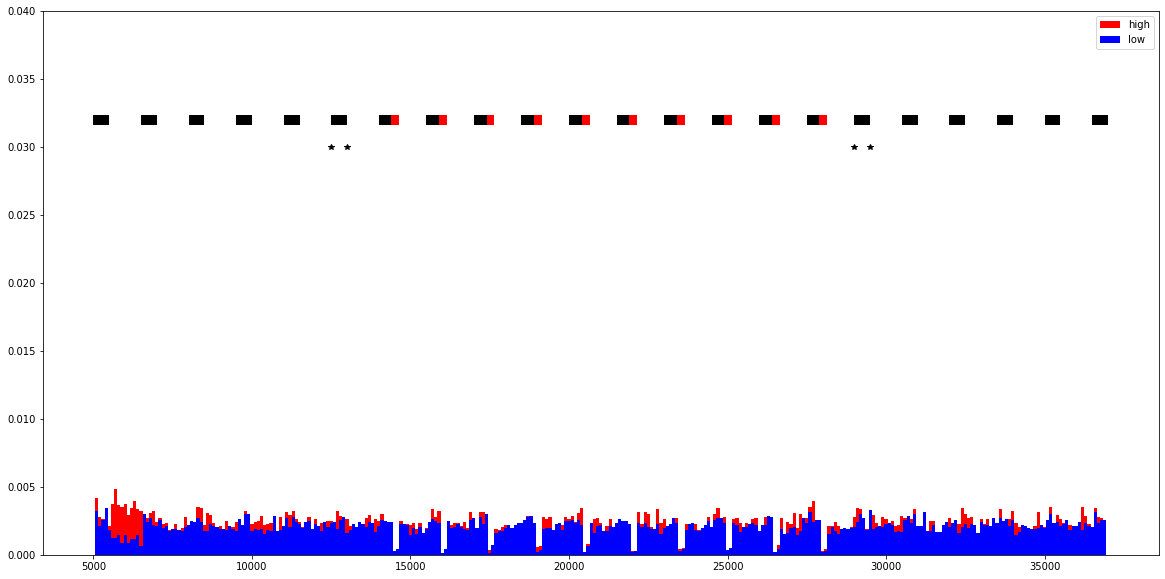

In [24]:
highFR_PNA = fr_PNA[fr_PNA['quantile']==2].index.tolist()
lowFR_PNA = fr_PNA[fr_PNA['quantile']==1].index.tolist()

highFR_PNC = fr_PNC[fr_PNC['quantile']==2].index.tolist()
lowFR_PNC = fr_PNC[fr_PNC['quantile']==1].index.tolist()

highFR_PV = fr_PV[fr_PV['quantile']==2].index.tolist()
lowFR_PV = fr_PV[fr_PV['quantile']==1].index.tolist()

plt.figure(figsize=(20,10))
n,b = np.histogram(ts_PV[np.isin(nids_PV,highFR_PV)],bins=np.arange(5000,37000,100))
plt.bar(b[1:],(n/100)/np.unique(highFR_PV).shape[0],color='red',width=100,label='high')

n,b = np.histogram(ts_PV[np.isin(nids_PV,lowFR_PV)],bins=np.arange(5000,37000,100))
plt.bar(b[1:],(n/100)/np.unique(lowFR_PV).shape[0],color='blue',width=100,label='low')

for i in np.arange(5000,37000,1500):
    plt.hlines(0.032,i,i+500,linewidth=10)
    
for i in np.arange(14400,28000,1500):
    plt.hlines(0.032,i,i+250,linewidth=10,color='r')

plt.ylim(0,0.04)
plt.plot(12500, 0.03,'k*')
plt.plot(13000, 0.03,'k*')

plt.plot(29000, 0.03,'k*')
plt.plot(29500, 0.03,'k*')
plt.legend()
plt.savefig('toneshockPVhist.pdf')


In [25]:
ts_high_PV = ts_PV[np.isin(nids_PV,highFR_PV)]
pre_PV_high = ts_high_PV[(ts_high_PV>=12500) & (ts_high_PV<=13000)].shape[0]
post_PV_high = ts_high_PV[(ts_high_PV>=29000) & (ts_high_PV<=29500)].shape[0]

ts_low_PV = ts_PV[np.isin(nids_PV,lowFR_PV)]
pre_PV_low = ts_low_PV[(ts_low_PV>=12500) & (ts_low_PV<=13000)].shape[0]
post_PV_low = ts_low_PV[(ts_low_PV>=29000) & (ts_low_PV<=29500)].shape[0]

ts_high_PNA = ts_PNA[np.isin(nids_PNA,highFR_PNA)]
pre_PNA_high = ts_high_PNA[(ts_high_PNA>=12500) & (ts_high_PNA<=13000)].shape[0]
post_PNA_high = ts_high_PNA[(ts_high_PNA>=29000) & (ts_high_PNA<=29500)].shape[0]

ts_low_PNA = ts_PNA[np.isin(nids_PNA,lowFR_PNA)]
pre_PNA_low = ts_low_PNA[(ts_low_PNA>=12500) & (ts_low_PNA<=13000)].shape[0]
post_PNA_low = ts_low_PNA[(ts_low_PNA>=29000) & (ts_low_PNA<=29500)].shape[0]

ts_high_PNC = ts_PNC[np.isin(nids_PNC,highFR_PNC)]
pre_PNC_high = ts_high_PNC[(ts_high_PNC>=12500) & (ts_high_PNC<=13000)].shape[0]
post_PNC_high = ts_high_PNC[(ts_high_PNC>=29000) & (ts_high_PNC<=29500)].shape[0]

ts_low_PNC = ts_PNC[np.isin(nids_PNC,lowFR_PNC)]
pre_PNC_low = ts_low_PNC[(ts_low_PNC>=12500) & (ts_low_PNC<=13000)].shape[0]
post_PNC_low = ts_low_PNC[(ts_low_PNC>=29000) & (ts_low_PNC<=29500)].shape[0]

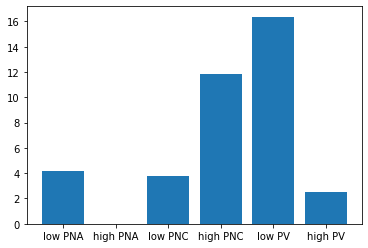

In [26]:
plt.bar(['low PNA',
         'high PNA',
         'low PNC',
         'high PNC',
         'low PV',
         'high PV'],
        [100*(post_PNA_low-pre_PNA_low)/pre_PNA_low, 
         100*(post_PNA_high-pre_PNA_high)/pre_PNA_high,
         100*(post_PNC_low-pre_PNC_low)/pre_PNC_low, 
         100*(post_PNC_high-pre_PNC_high)/pre_PNC_high,
         100*(post_PV_low-pre_PV_low)/pre_PV_low,
         100*(post_PV_high-pre_PV_high)/pre_PV_high])

plt.savefig('tone_cond_100p.pdf')

<BarContainer object of 2 artists>

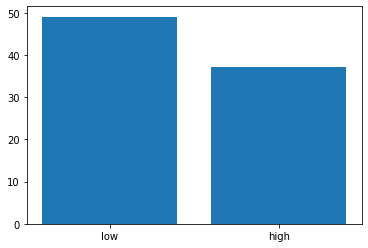

In [194]:
plt.bar(['low','high'],[100*(post_PV_low-pre_PV_low)/pre_PV_low, 100*(post_PV_high-pre_PV_high)/pre_PV_high])

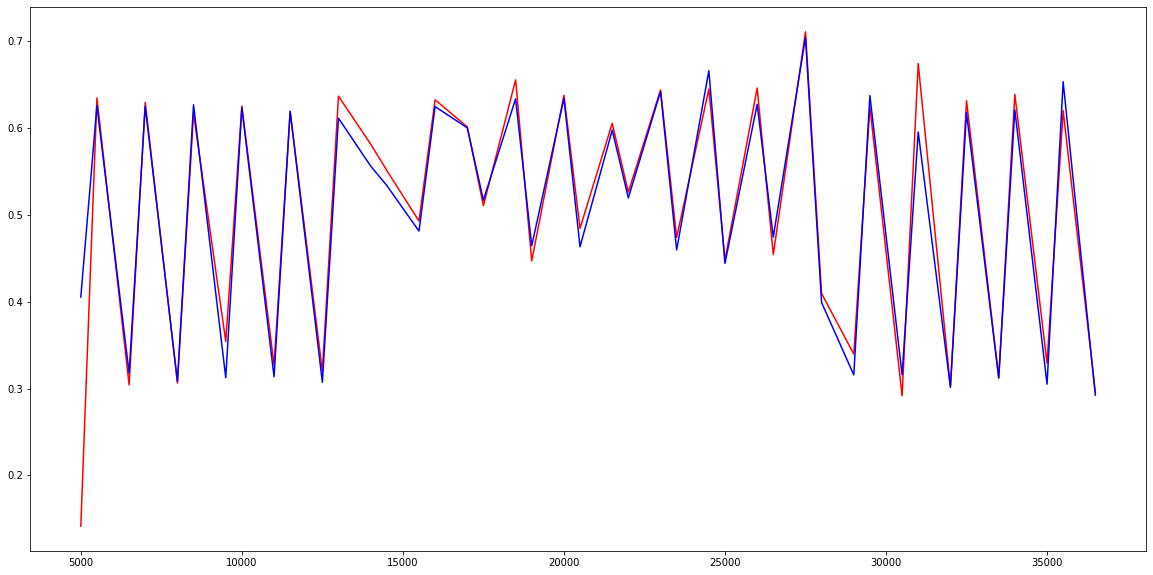

In [606]:
plt.figure(figsize=(20,10))
bns = []
for i in np.arange(5000,37000,1500):
    bns.append(i)
    bns.append(i+500)

n,b = np.histogram(ts_PNA[np.isin(nids_PNA,highFR_PNA)],bins=bns)
plt.plot(b[:-1],n/np.unique(highFR_PNA).shape[0],color='red',label='high')

n,b = np.histogram(ts_PNA[np.isin(nids_PNA,lowFR_PNA)],bins=bns)
plt.plot(b[:-1],n/np.unique(lowFR_PNA).shape[0],color='blue',label='low')

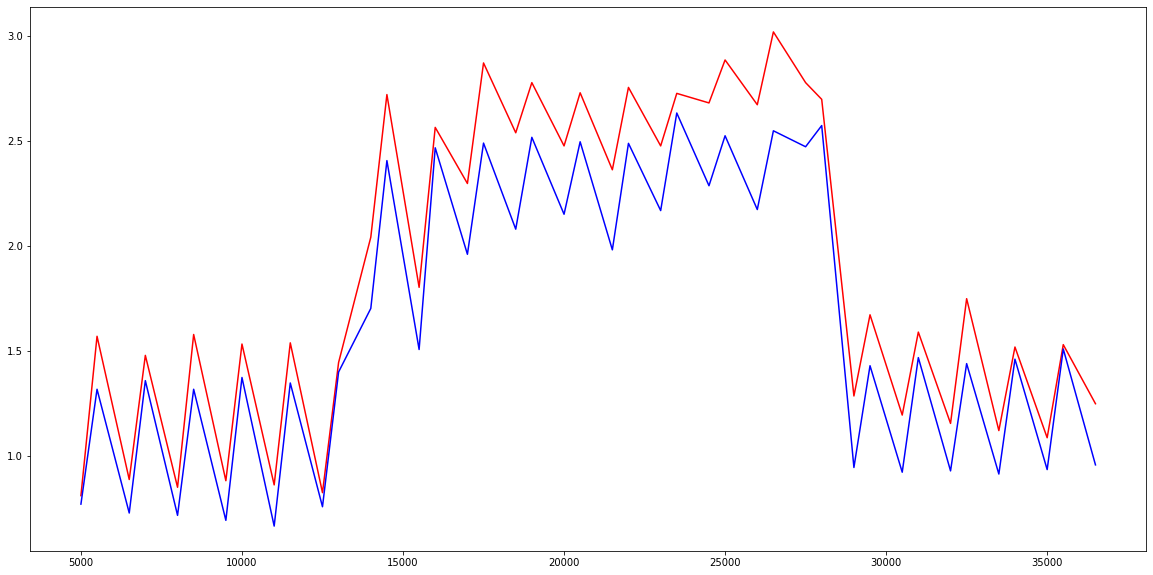

In [604]:
plt.figure(figsize=(20,10))
bns = []
for i in np.arange(5000,37000,1500):
    bns.append(i)
    bns.append(i+500)

n,b = np.histogram(ts_PNC[np.isin(nids_PNC,highFR_PNC)],bins=bns)
plt.plot(b[:-1],n/np.unique(highFR_PNC).shape[0],color='red',label='high')

n,b = np.histogram(ts_PNC[np.isin(nids_PNC,lowFR_PNC)],bins=bns)
plt.plot(b[:-1],n/np.unique(lowFR_PNC).shape[0],color='blue',label='low')

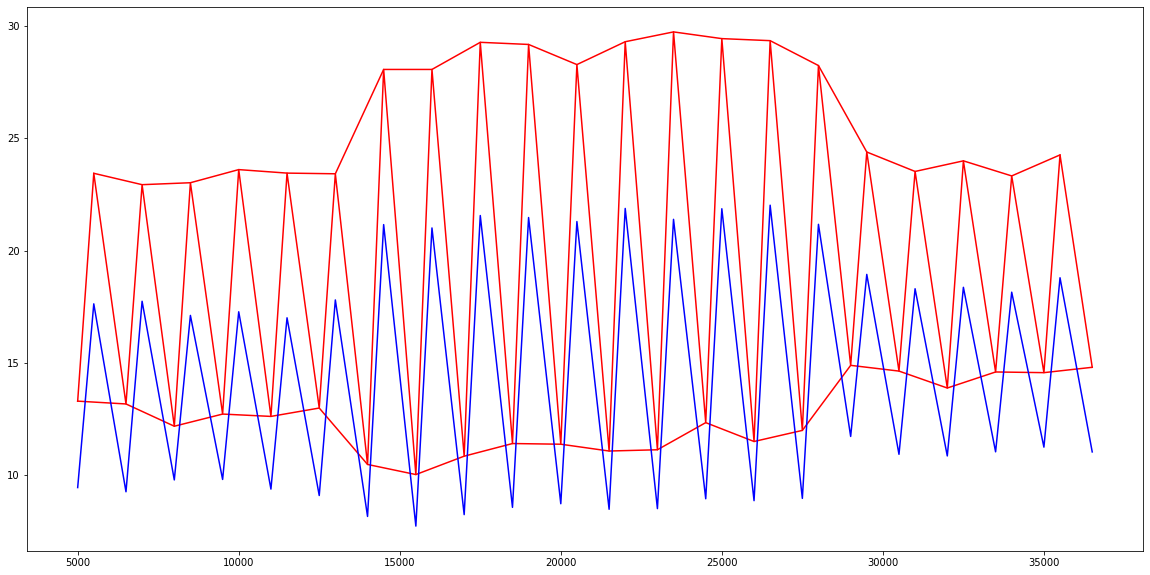

In [610]:
plt.figure(figsize=(20,10))
bns = []
for i in np.arange(5000,37000,1500):
    bns.append(i)
    bns.append(i+500)

n,b = np.histogram(ts_PV[np.isin(nids_PV,highFR_PV)],bins=bns)
plt.plot(b[:-1],n/np.unique(highFR_PV).shape[0],color='red',label='high')

n,b = np.histogram(ts_PV[np.isin(nids_PV,highFR_PV)],bins=bns)
plt.plot(b[:-1][::2],n[::2]/np.unique(highFR_PV).shape[0],color='red',label='high')

n,b = np.histogram(ts_PV[np.isin(nids_PV,highFR_PV)],bins=bns)
plt.plot(b[1:-1][::2],n[1:][::2]/np.unique(highFR_PV).shape[0],color='red',label='high')

n,b = np.histogram(ts_PV[np.isin(nids_PV,lowFR_PV)],bins=bns)
plt.plot(b[:-1],n/np.unique(lowFR_PV).shape[0],color='blue',label='low')

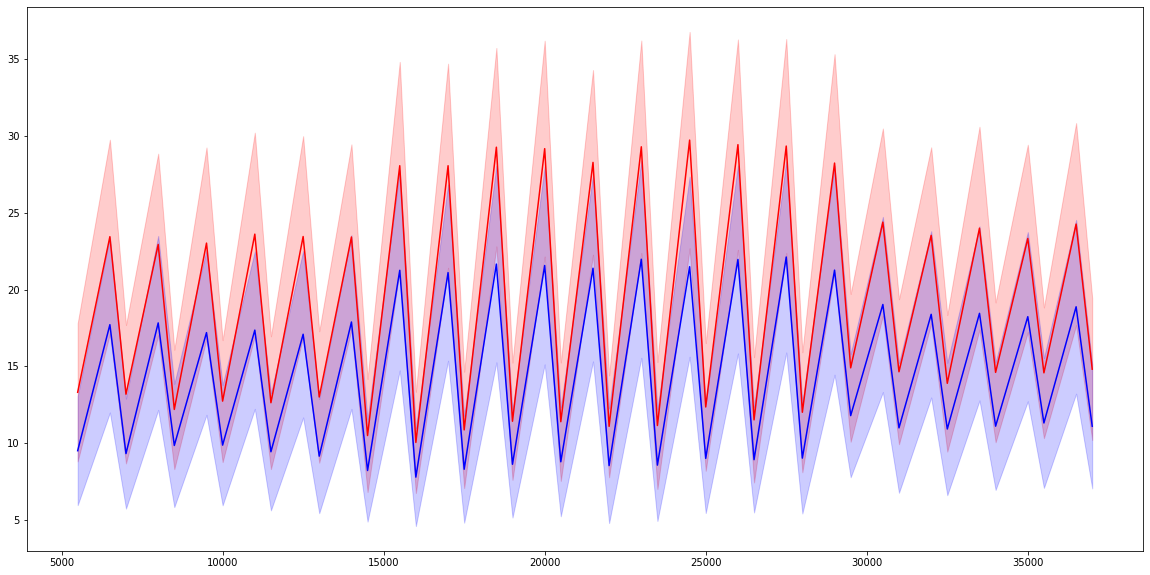

In [596]:
plt.figure(figsize=(20,10))
bns = []
for i in np.arange(5000,37000,1500):
    bns.append(i)
    bns.append(i+500)

L=[]
for s in highFR_PV:
    n,b = np.histogram(ts_PV[nids_PV==s],bins=bns)
    L.append((n).reshape(1,-1))
plt.plot(b[1:],np.mean(np.concatenate(L),axis=0),color='red',label='high')
plt.fill_between(b[1:],
                 np.mean(np.concatenate(L),axis=0)-np.std(np.concatenate(L),axis=0),
                 np.mean(np.concatenate(L),axis=0)+np.std(np.concatenate(L),axis=0),
                 color='r',alpha=0.2)

L=[]
for s in lowFR_PV[:-1]:
    n,b = np.histogram(ts_PV[nids_PV==s],bins=bns)
    L.append((n).reshape(1,-1))
plt.plot(b[1:],np.mean(np.concatenate(L),axis=0),color='blue',label='high')
plt.fill_between(b[1:],
                 np.mean(np.concatenate(L),axis=0)-np.std(np.concatenate(L),axis=0),
                 np.mean(np.concatenate(L),axis=0)+np.std(np.concatenate(L),axis=0),
                 color='blue',alpha=0.2)

# Tone

In [223]:
f = h5py.File('./tone_trials/spikes.h5','r')
g = h5py.File('./tone_trials/spikes.h5','r')
h = h5py.File('./tone_trials/spikes.h5','r')

PNA = [0,2844]
PNC = [2845, 3999]
PV = [4000, 4465]
SOM = [4466, 4721]

ts = f['spikes']['BLA']['timestamps'][:]
nids = f['spikes']['BLA']['node_ids'][:]

In [226]:
ts_PV = ts[(nids>4000) & (nids<4465)]
nids_PV = nids[(nids>4000) & (nids<4465)]

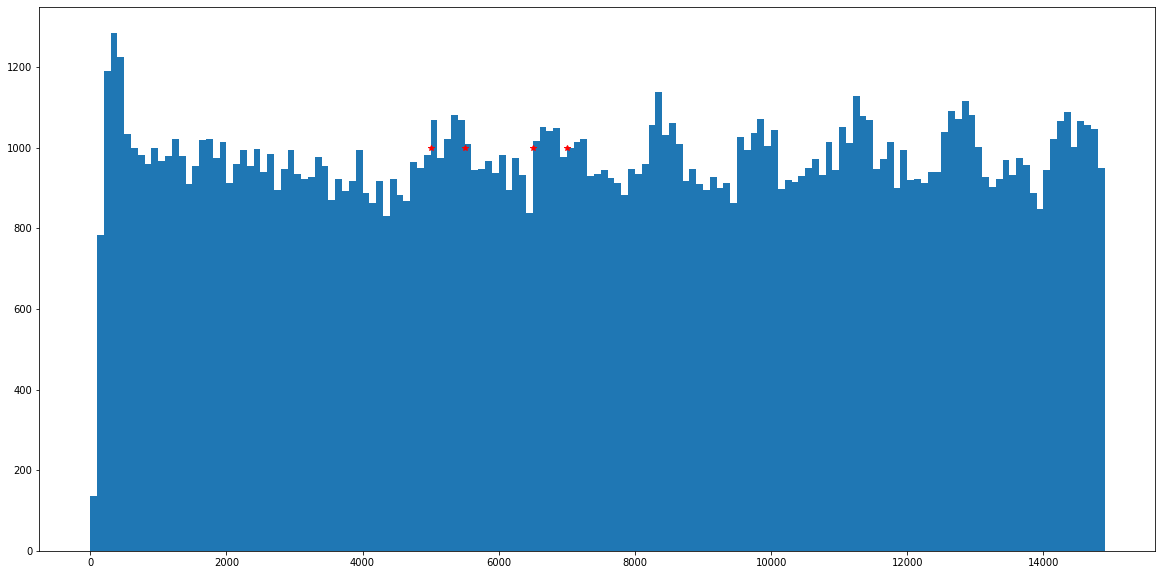

In [349]:
plt.figure(figsize=(20,10))
plt.hist(ts_PV,bins=np.arange(0,15000,100))
plt.plot(5000,1000,'r*')
plt.plot(5500,1000,'r*')
plt.plot(6500,1000,'r*')
plt.plot(7000,1000,'r*')
plt.show()

In [228]:
df_baseline = pd.DataFrame(data=np.concatenate((ts[(ts>3000)].reshape(-1,1), nids[(ts>3000)].reshape(-1,1)),axis=1), 
                           columns=['timestamps','node_ids'])
df_baseline['type'] = 'PNA'
df_baseline.loc[(df_baseline['node_ids']>=PNC[0]) & 
                (df_baseline['node_ids']<=PNC[1]), 'type'] = 'PNC'
df_baseline.loc[(df_baseline['node_ids']>=PV[0]) & 
                (df_baseline['node_ids']<=PV[1]), 'type'] = 'PV'
df_baseline.loc[(df_baseline['node_ids']>=SOM[0]) & 
                (df_baseline['node_ids']<=SOM[1]), 'type'] = 'SOM'

############## 50% block #################
ts = g['spikes']['BLA']['timestamps'][:]
nids = g['spikes']['BLA']['node_ids'][:]

df_50p = pd.DataFrame(data=np.concatenate((ts[(ts>3000)].reshape(-1,1), nids[(ts>3000)].reshape(-1,1)),axis=1), 
                           columns=['timestamps','node_ids'])
df_50p['type'] = 'PNA'
df_50p.loc[(df_50p['node_ids']>=PNC[0]) & 
                (df_50p['node_ids']<=PNC[1]), 'type'] = 'PNC'
df_50p.loc[(df_50p['node_ids']>=PV[0]) & 
                (df_50p['node_ids']<=PV[1]), 'type'] = 'PV'
df_50p.loc[(df_50p['node_ids']>=SOM[0]) & 
                (df_50p['node_ids']<=SOM[1]), 'type'] = 'SOM'

############## 100% block #################
ts = h['spikes']['BLA']['timestamps'][:]
nids = h['spikes']['BLA']['node_ids'][:]

df_100p = pd.DataFrame(data=np.concatenate((ts[(ts>3000)].reshape(-1,1), nids[(ts>3000)].reshape(-1,1)),axis=1), 
                           columns=['timestamps','node_ids'])
df_100p['type'] = 'PNA'
df_100p.loc[(df_100p['node_ids']>=PNC[0]) & 
                (df_100p['node_ids']<=PNC[1]), 'type'] = 'PNC'
df_100p.loc[(df_100p['node_ids']>=PV[0]) & 
                (df_100p['node_ids']<=PV[1]), 'type'] = 'PV'
df_100p.loc[(df_100p['node_ids']>=SOM[0]) & 
                (df_100p['node_ids']<=SOM[1]), 'type'] = 'SOM'


In [232]:
pre_fr_PNA = df_baseline[(df_baseline.timestamps>4000)&
                         (df_baseline.timestamps<5000)&
                         (df_baseline.type=='PNA')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'pre_FR'})
post_fr_PNA = df_baseline[(df_baseline.timestamps>13000)&
                          (df_baseline.timestamps<14000)&
                          (df_baseline.type=='PNA')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'post_FR'})

pre_fr_PNC = df_baseline[(df_baseline.timestamps>4000)&
                         (df_baseline.timestamps<5000)&
                         (df_baseline.type=='PNC')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'pre_FR'})
post_fr_PNC = df_baseline[(df_baseline.timestamps>13000)&
                          (df_baseline.timestamps<14000)&
                          (df_baseline.type=='PNC')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'post_FR'})

pre_fr_PV = df_baseline[(df_baseline.timestamps>4000)&
                         (df_baseline.timestamps<5000)&
                         (df_baseline.type=='PV')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'pre_FR'})
post_fr_PV = df_baseline[(df_baseline.timestamps>13000)&
                          (df_baseline.timestamps<14000)&
                          (df_baseline.type=='PV')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'post_FR'})

fr_PNA = pre_fr_PNA.set_index('node_ids').join(post_fr_PNA.set_index('node_ids'))
fr_PNC = pre_fr_PNC.set_index('node_ids').join(post_fr_PNC.set_index('node_ids'))
fr_PV = pre_fr_PV.set_index('node_ids').join(post_fr_PV.set_index('node_ids'))

fr_PNA['perc_change'] = 100*(fr_PNA['post_FR'] - fr_PNA['pre_FR']) / fr_PNA['pre_FR']
fr_PNC['perc_change'] = 100*(fr_PNC['post_FR'] - fr_PNC['pre_FR']) / fr_PNC['pre_FR']
fr_PV['perc_change'] = 100*(fr_PV['post_FR'] - fr_PV['pre_FR']) / fr_PV['pre_FR']

In [240]:
q = np.median(fr_PNA['pre_FR'])

fr_PNA.loc[(fr_PNA['pre_FR']<=q),'quantile'] = 1
fr_PNA.loc[(fr_PNA['pre_FR']>q),'quantile'] = 2
    
q = np.median(fr_PNC['pre_FR'])

fr_PNC.loc[(fr_PNC['pre_FR']<=q),'quantile'] = 1
fr_PNC.loc[(fr_PNC['pre_FR']>q),'quantile'] = 2
    
q = np.median(fr_PV['pre_FR'])

fr_PV.loc[(fr_PV['pre_FR']<=q),'quantile'] = 1
fr_PV.loc[(fr_PV['pre_FR']>q),'quantile'] = 2

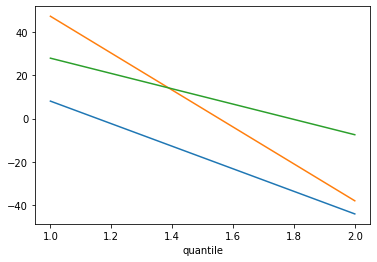

In [246]:
fr_PNA.groupby('quantile')['perc_change'].mean().plot()
fr_PNC.groupby('quantile')['perc_change'].mean().plot()
fr_PV.groupby('quantile')['perc_change'].mean().plot()

plt.savefig('tone_potentiation.pdf')

In [243]:
np.median(fr_PNA['pre_FR'])

1.0

In [242]:
fr_PNA[fr_PNA<=1]['']

,pre_FR,post_FR,perc_change,quantile
node_ids,,,,
1.0,1,1.0,0.0,1.0
7.0,1,1.0,0.0,1.0
10.0,1,NaN,NaN,1.0
11.0,1,NaN,NaN,1.0
13.0,1,NaN,NaN,1.0


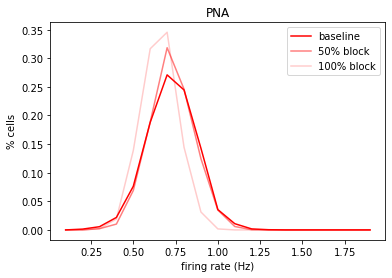

In [181]:
plt.title('PNA')
#plt.subplot(3,1,1)
n,b = np.histogram(df_baseline[df_baseline.type=='PNA'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,20,1))
plt.plot(b[1:]/10,n/np.sum(n),label='baseline',color='r')

#plt.subplot(3,1,2)
n,b = np.histogram(df_50p[df_50p.type=='PNA'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,20,1))
plt.plot(b[1:]/10,n/np.sum(n),label='50% block',color='r', alpha=0.5)

#plt.subplot(3,1,3)
n,b = np.histogram(df_100p[df_100p.type=='PNA'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,20,1))
plt.plot(b[1:]/10,n/np.sum(n),label='100% block',color='r', alpha=0.2)

plt.legend()

plt.xlabel('firing rate (Hz)')
plt.ylabel('% cells')
plt.savefig('PNA_blockade_FR.pdf')

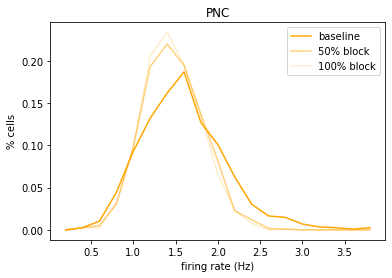

In [180]:
plt.title('PNC')
#plt.subplot(3,1,1)
n,b = np.histogram(df_baseline[df_baseline.type=='PNC'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,40,2))
plt.plot(b[1:]/10,n/np.sum(n),label='baseline',color='orange')

#plt.subplot(3,1,2)
n,b = np.histogram(df_50p[df_50p.type=='PNC'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,40,2))
plt.plot(b[1:]/10,n/np.sum(n),label='50% block',color='orange', alpha=0.5)

#plt.subplot(3,1,3)
n,b = np.histogram(df_100p[df_100p.type=='PNC'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,40,2))
plt.plot(b[1:]/10,n/np.sum(n),label='100% block',color='orange', alpha=0.2)

plt.legend()

plt.xlabel('firing rate (Hz)')
plt.ylabel('% cells')
plt.savefig('PNC_blockade_FR.pdf')

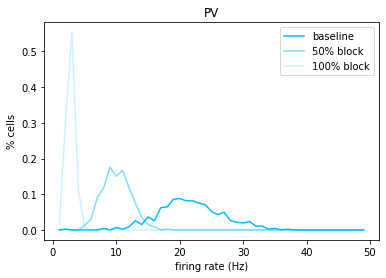

In [178]:
plt.title('PV')
#plt.subplot(3,1,1)
n,b = np.histogram(df_baseline[df_baseline.type=='PV'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,500,10))
plt.plot(b[1:]/10,n/np.sum(n),label='baseline',color='deepskyblue')

#plt.subplot(3,1,2)
n,b = np.histogram(df_50p[df_50p.type=='PV'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,500,10))
plt.plot(b[1:]/10,n/np.sum(n),label='50% block',color='deepskyblue',alpha=0.5)

#plt.subplot(3,1,3)
n,b = np.histogram(df_100p[df_100p.type=='PV'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,500,10))
plt.plot(b[1:]/10,n/np.sum(n),label='100% block',color='deepskyblue',alpha=0.2)

plt.legend()

plt.xlabel('firing rate (Hz)')
plt.ylabel('% cells')
plt.savefig('PV_blockade_FR.pdf')

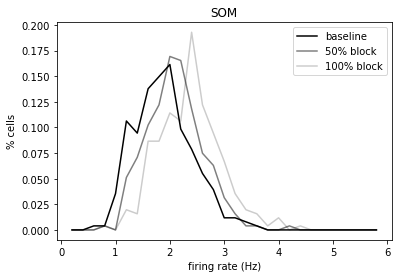

In [179]:
plt.title('SOM')
#plt.subplot(3,1,1)
n,b = np.histogram(df_baseline[df_baseline.type=='SOM'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,60,2))
plt.plot(b[1:]/10,n/np.sum(n),label='baseline', color='k')

#plt.subplot(3,1,2)
n,b = np.histogram(df_50p[df_50p.type=='SOM'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,60,2))
plt.plot(b[1:]/10,n/np.sum(n),label='50% block', color='k', alpha=0.5)

#plt.subplot(3,1,3)
n,b = np.histogram(df_100p[df_100p.type=='SOM'].groupby('node_ids')['timestamps'].count().values,
                   bins=np.arange(0,60,2))
plt.plot(b[1:]/10,n/np.sum(n),label='100% block', color='k', alpha=0.2)

plt.legend()

plt.xlabel('firing rate (Hz)')
plt.ylabel('% cells')
plt.savefig('SOM_blockade_FR.pdf')

In [254]:
lowFR_PNA = fr_PNA[(fr_PNA.pre_FR<=1)&(fr_PNA.index<41)].index.tolist()

[1.0,
 7.0,
 10.0,
 11.0,
 13.0,
 14.0,
 15.0,
 16.0,
 20.0,
 28.0,
 30.0,
 33.0,
 35.0,
 36.0,
 37.0,
 38.0]

In [261]:
pre_fr_PNA = df_baseline[(df_baseline.timestamps>1000)&
                         (df_baseline.timestamps<5000)&
                         (df_baseline.type=='PNA')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'pre_FR'})
post_fr_PNA = df_baseline[(df_baseline.timestamps>13000)&
                          (df_baseline.timestamps<14000)&
                          (df_baseline.type=='PNA')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'post_FR'})

pre_fr_PNC = df_baseline[(df_baseline.timestamps>1000)&
                         (df_baseline.timestamps<5000)&
                         (df_baseline.type=='PNC')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'pre_FR'})
post_fr_PNC = df_baseline[(df_baseline.timestamps>13000)&
                          (df_baseline.timestamps<14000)&
                          (df_baseline.type=='PNC')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'post_FR'})

pre_fr_PV = df_baseline[(df_baseline.timestamps>1000)&
                         (df_baseline.timestamps<5000)&
                         (df_baseline.type=='PV')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'pre_FR'})
post_fr_PV = df_baseline[(df_baseline.timestamps>13000)&
                          (df_baseline.timestamps<14000)&
                          (df_baseline.type=='PV')].groupby('node_ids')['timestamps'].count().reset_index().rename(columns={'timestamps':'post_FR'})

fr_PNA = pre_fr_PNA.set_index('node_ids').join(post_fr_PNA.set_index('node_ids'))
fr_PNC = pre_fr_PNC.set_index('node_ids').join(post_fr_PNC.set_index('node_ids'))
fr_PV = pre_fr_PV.set_index('node_ids').join(post_fr_PV.set_index('node_ids'))

fr_PNA['perc_change'] = 100*(fr_PNA['post_FR'] - fr_PNA['pre_FR']) / fr_PNA['pre_FR']
fr_PNC['perc_change'] = 100*(fr_PNC['post_FR'] - fr_PNC['pre_FR']) / fr_PNC['pre_FR']
fr_PV['perc_change'] = 100*(fr_PV['post_FR'] - fr_PV['pre_FR']) / fr_PV['pre_FR']

In [289]:
fr_PV['pre_FR'].median()

39.0

In [157]:
from bmtk.utils.reports.compartment import CompartmentReport

spikes_b = h5py.File('./baseline/spikes.h5','r')

ts = spikes_b['spikes']['BLA']['timestamps'][:]
nids = spikes_b['spikes']['BLA']['node_ids'][:]

r1_baseline_NMDA = CompartmentReport('./baseline/PN2PV_i_NMDA.h5')
r2_baseline_NMDA = CompartmentReport('./baseline/tone2PV_i_NMDA.h5')
#r3_baseline_NMDA = CompartmentReport('./baseline/BG2PN_i_AMPA.h5')

mem_pot = CompartmentReport('./baseline/v_report.h5')

L = []; L_m = []; L_v = []

for n in np.arange(4001,4041):
    print(n)
    node_id = n

    #mem_pot_b = mem_pot.data(node_id=node_id,time_window=(5000,15000))

    r1_b = r1_baseline_NMDA.data(node_id=node_id,time_window=(5000,15000))
    r2_b = r2_baseline_NMDA.data(node_id=node_id,time_window=(5000,15000))
    #r3_b = r3_baseline_NMDA.data(node_id=node_id,time_window=(5000,15000))

    i_NMDA = np.sum(np.concatenate((r1_b,r2_b), axis=1),axis=1)
    #v = mem_pot.data(node_id=node_id,time_window=(5000,15000))

    spkts = (ts[(nids==n)&(ts>5000+25)&(ts<15000-25)]*10).astype(int).reshape(-1,1)-50000 # reset to starting time
    spkts = spkts[::3]
    inds_m = np.concatenate([spkts-i for i in np.arange(1,251)])
    inds_p = np.concatenate([spkts+i for i in np.arange(1,251)])
    inds = np.sort(np.concatenate((inds_m,inds_p)).reshape(1,-1))
    
    L.append(i_NMDA[inds].reshape(spkts.shape[0],500))
    L_m.append(np.mean(i_NMDA[inds].reshape(spkts.shape[0],500),axis=0).reshape(1,-1))
    #L_v.append(v[inds].reshape(spkts.shape[0],500))

4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040


In [158]:
np.save('STA_NMDA_PV',np.concatenate(L))

In [159]:
np.save('STA_NMDA_PV_mean',np.concatenate(L_m))

In [160]:
AMPA_PV = np.load('STA_AMPA_PV.npy')
NMDA_PV = np.load('STA_NMDA_PV.npy')

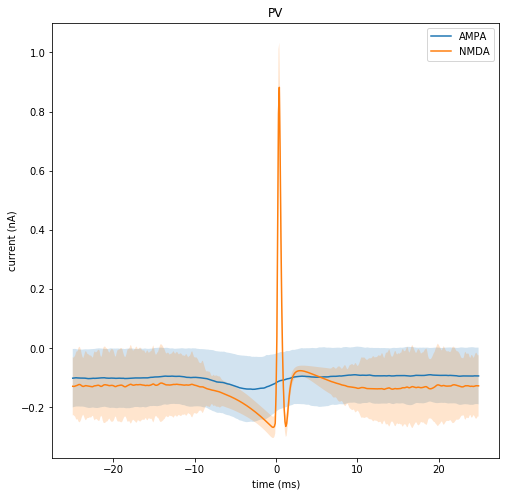

In [165]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(-25,25,0.1),np.mean(AMPA_PV,axis=0), label='AMPA')
plt.fill_between(np.arange(-25,25,0.1),
                np.mean(AMPA_PV,axis=0)-np.std(AMPA_PV,axis=0),
                np.mean(AMPA_PV,axis=0)+np.std(AMPA_PV,axis=0),
                alpha=0.2)
plt.plot(np.arange(-25,25,0.1),np.mean(NMDA_PV,axis=0), label='NMDA')
plt.fill_between(np.arange(-25,25,0.1),
                np.mean(NMDA_PV,axis=0)-np.std(NMDA_PV,axis=0),
                np.mean(NMDA_PV,axis=0)+np.std(NMDA_PV,axis=0),
                alpha=0.2)
plt.ylabel('current (nA)')
plt.xlabel('time (ms)')
plt.title('PV')
plt.legend()
plt.savefig('STA_PV.pdf')

In [166]:
AMPA_PNC = np.load('STA_AMPA_PNC.npy')
NMDA_PNC = np.load('STA_NMDA_PNC.npy')

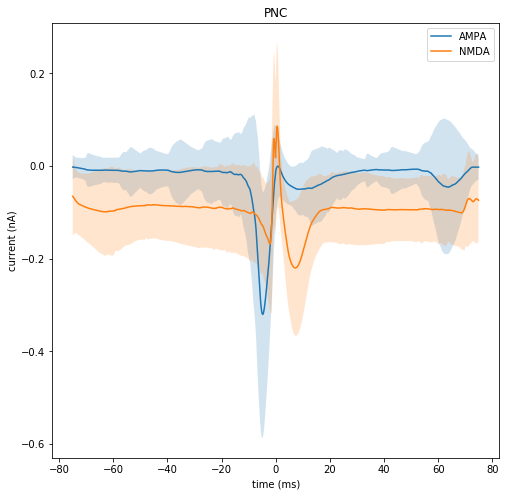

In [167]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(-75,75,0.1),np.mean(AMPA_PNC,axis=0), label='AMPA')
plt.fill_between(np.arange(-75,75,0.1),
                np.mean(AMPA_PNC,axis=0)-np.std(AMPA_PNC,axis=0),
                np.mean(AMPA_PNC,axis=0)+np.std(AMPA_PNC,axis=0),
                alpha=0.2)
plt.plot(np.arange(-75,75,0.1),np.mean(NMDA_PNC,axis=0), label='NMDA')
plt.fill_between(np.arange(-75,75,0.1),
                np.mean(NMDA_PNC,axis=0)-np.std(NMDA_PNC,axis=0),
                np.mean(NMDA_PNC,axis=0)+np.std(NMDA_PNC,axis=0),
                alpha=0.2)
plt.ylabel('current (nA)')
plt.xlabel('time (ms)')
plt.title('PNC')
plt.legend()
plt.savefig('STA_PNC.pdf')

In [168]:
AMPA_PNA = np.load('STA_AMPA_PNA.npy')
NMDA_PNA = np.load('STA_NMDA_PNA.npy')

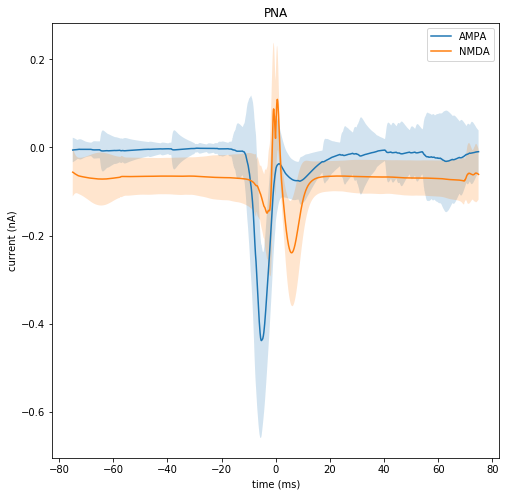

In [169]:
plt.figure(figsize=(8,8))
plt.plot(np.arange(-75,75,0.1),np.mean(AMPA_PNA,axis=0), label='AMPA')
plt.fill_between(np.arange(-75,75,0.1),
                np.mean(AMPA_PNA,axis=0)-np.std(AMPA_PNA,axis=0),
                np.mean(AMPA_PNA,axis=0)+np.std(AMPA_PNA,axis=0),
                alpha=0.2)
plt.plot(np.arange(-75,75,0.1),np.mean(NMDA_PNA,axis=0), label='NMDA')
plt.fill_between(np.arange(-75,75,0.1),
                np.mean(NMDA_PNA,axis=0)-np.std(NMDA_PNA,axis=0),
                np.mean(NMDA_PNA,axis=0)+np.std(NMDA_PNA,axis=0),
                alpha=0.2)
plt.ylabel('current (nA)')
plt.xlabel('time (ms)')
plt.title('PNA')
plt.legend()
plt.savefig('STA_PNA.pdf')